# Assignment 4

### A selection of interesting solutions

#### Task 5: A neat and well documented solution

In [ ]:
def perceptron_train(X, Y, iterations=100, eta=.1):
    
    # Initialize accuracy
    acc = np.zeros(iterations)
    
    # find num of features
    _, n_features = X.shape
    
    # Initialize weights
    w = np.ones(n_features) / n_features
    
    # Initialize some help variables: 
    # correct_results_num - number of correct results per iteration; 
    # random_weight_corrected indicates that one random weight of 
    # a missclassified image per iteration is found
    correct_results_num = 0
    random_weight_corrected = False
    
    for it in range(1, iterations + 1):
        # choose random idxs of the elements of X:  
        for i in np.random.choice(np.arange(len(X)), size = len(X)):
            
            # sign(w.T*xi) - if w.T * xi more than 0 then 1, otherwise -1 
            if np.dot(w.T, X[i]) > 0:
                y_pred = 1
            else: 
                y_pred = -1

            # if predicted value equal practical value then add one 
            # more positive result, otherwise - correction of weights
            if y_pred == Y[i]:
                correct_results_num += 1
            # correction of weights occures once per iteration
            elif random_weight_corrected == False:
                random_weight_corrected = True
                w = w + eta / it * X[i] * Y[i]
                
        # Accuracy - number_correct_predictions / num_predictions
        acc[it-1] = correct_results_num / len(X)
        
        # reset help variables 
        random_weight_corrected = False
        correct_results_num = 0

    # Return weights vector and accuracy
    return w, acc

#### Task 5: Another neat solution. 

**Note**: the random seed is also a Hyperparameter, which people sometimes fine-tune via CV. Apart from the random initialization of the weights, the training process has more randomness to it (for instance, SGD also has some extra parameters like momentum). Try the code below for the digit **8**. You will notice that the algorithm will start at 100% accuracy, because the chosen seed is exactly right for that one case. With another seed, you would start at around 0 as expected.

In [ ]:
def perceptron_train(X, Y, iterations=100, eta=.1):
    
    acc = np.zeros(iterations)
    np.random.seed(2023)
    
    # Initialize weight vector
    weights = np.random.rand(X.shape[1])
    count = 0 # helper to calculate the acc (stores number of not correctly classified values)
    
    for it in range(100):
        i = int(np.ceil(np.random.rand(1)*X.shape[0]))          # pick a random example
        if np.sign(np.dot(weights.T, X[i])) != np.sign(Y[i]):   # check if correctly classified
            weights = weights + eta/(it+1) * (X[i]*Y[i])        # update weights if not correct
            count = count+1                                     # add one to number of wrong classified

        acc[it] = 1-(count/(it+1))                              # calculate acc for every step
    
    print("Final Accuracy: " + str(acc[it]) + " after " + str(it+1) + " steps.")        
    # Return weight vector and accuracy
    return weights, acc

#### Task 5: Testing the random guess first

**Note**: If we did this in the example above and checked the accuracy against a threshold, we could have decided that there is no training necessary at all for learning the digit **8** 8^)

In [ ]:
def perceptron_train(X, Y, iterations=100, eta=.1):
    
    acc = np.zeros(iterations)
    
    # Initialize weight vector
    weights = np.repeat(1/len(X[0]), len(X[0]))
    
    missclassified = [] #initalize missclassified examples 
    for k in range(len(X)):
        if np.sign(sum(weights.T*X[k])) != Y[k]:
            missclassified.append(k)
    
    #set accuracy for first iteration with 1/D weights
    acc[0] = 1-(len(missclassified)/len(Y))
    
    for it in range(1, iterations):
        correct = 0
        m = np.random.randint(0, len(missclassified))  #pick a random index of missclassified example list
        r = missclassified[m] #get index for X & Y of missclassified example 

        weights = weights + ((eta/(it)) * X[r]*Y[r]) #update weights with random missclassified example 

        missclassified = [] #update missclassified list 
        for i in range(len(Y)):
            if np.sign(sum(weights.T*X[i])) != Y[i]:
                missclassified.append(i) 
        
        #count correct predictions with updated weights
        correct_predictions = len(Y) - len(missclassified)
        acc[iter] = correct_predictions/len(Y)

    return weights, acc

#### Task 5: Extra investigation of misclassifications

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digit_to_recognize = 3 # You can pick any other one from 0 to 9

# Load the usps digits dataset from sklearn repository
X, Y = load_digits(n_class=10, return_X_y=True)

Z = Y

# Transform the 10-class labels into binary form
y = np.sign((Y == digit_to_recognize)* 1.0 - .5)
Y=y
iterations=100
eta=.1

# if you want to watch at different iterations
acc = np.zeros(iterations)# -99)

num_features = X.shape[1]
num_examples = X.shape[0]

# Initialize weight vector
weights = np.random.randn(X.shape[1])

for i in range(iterations):
    
    pred = []
    num_correct = 0
    for j in range(num_examples):
        
        est = np.dot(X[j], weights)
        if est >= 0:
            pred.append(True)
            prediction = 1
        else:
            pred.append(False)
            prediction = -1

        if prediction == Y[j]:
            num_correct += 1
        else:
            weights += eta/(i+1.) * Y[j] * X[j]
    acc_i = num_correct / num_examples

    acc[i] = acc_i

all digits that were predicted as "3": 
 [3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 8 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3]
index of missclassified digits: 
 [  3  40  63  85  92 122 154 171]


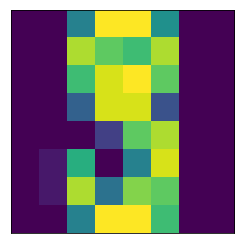

In [14]:
missclassified_idx = np.where(Z[pred]!=digit_to_recognize)[0]

# choose which idx/number to check (0 to len(missclassified_idx))
watch_misclas_idx = missclassified_idx[-1] # <-- here

X, Y = load_digits(n_class=10, return_X_y=True)

try:
    plt.matshow(X[np.where(pred)[0][watch_misclas_idx],:].reshape(8,8))
    plt.xticks([])
    plt.yticks([])
except:
    print("no missclassified values!")
print(f"all digits that were predicted as \"{digit_to_recognize}\": \n {Z[pred]}")
print(f"index of missclassified digits: \n {missclassified_idx}")

#### Task 5: Train only until a desired metric level is reached.

This what people actually do in practice: they check several metrics during training, so that they know in time if their algorithm has already converged. You don't want to train for 100 epochs, if you are already good enough after the first 10 epochs. On the contrary, you may run the risk that your SGD wanders off towards a suboptimal solution if you train for too long. In ML, this is called **Early Stopping**.

In [ ]:
def perceptron_train(x, y, iterations=100, eta=.1):
    
    # Initialize weight vector
    weights = np.random.rand(x.shape[1])

    iteration = 0
    accuracy = 0
    acc = list()
        
    # Repeat until maximum number of iterations or desired accuracy is reached
    while (iteration <= iterations) and (accuracy <= 0.999):
        
        total_error = 0
        
        # Repeat for every line
        for i in range(x.shape[0]):
                
            # Predict the label (1 or -1) of x[i] using the weights    
            label = 1 if weights @ x[i] >= 0 else -1
            
            # Update the weights of the perceptron only if x[i] is misclassified by y[i]
            if label != y[i]:
                weights = weights - (eta/(i+1.) * np.array([label*value for value in x[i]]))
                total_error += 1

        # Calculate accuracy and add it to list of accuracies "acc"
        accuracy = 1 - total_error/len(x)
        acc.append(accuracy)
        iteration += 1
              
    # Return weight vector and accuracy
    return weights, acc